In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [5]:
os.getcwd()

'C:\\code\\Uni\\ba\\notebooks'

In [2]:
data = pd.read_csv("metrics/eval_storage.csv")
data.head()

,Fold,Imputed Set,Model,Model Count,acc,b_acc,sensitivity,specificity,ppv,auc
0,0,1,rf,0,0.732143,0.693676,0.909091,0.478261,0.714286,0.792490
1,0,1,lr,0,0.750000,0.708827,0.939394,0.478261,0.720930,0.815547
2,0,2,rf,1,0.714286,0.685112,0.848485,0.521739,0.717949,0.801054
3,0,2,lr,1,0.714286,0.678524,0.878788,0.478261,0.707317,0.836627
4,0,3,rf,2,0.732143,0.693676,0.909091,0.478261,0.714286,0.781950


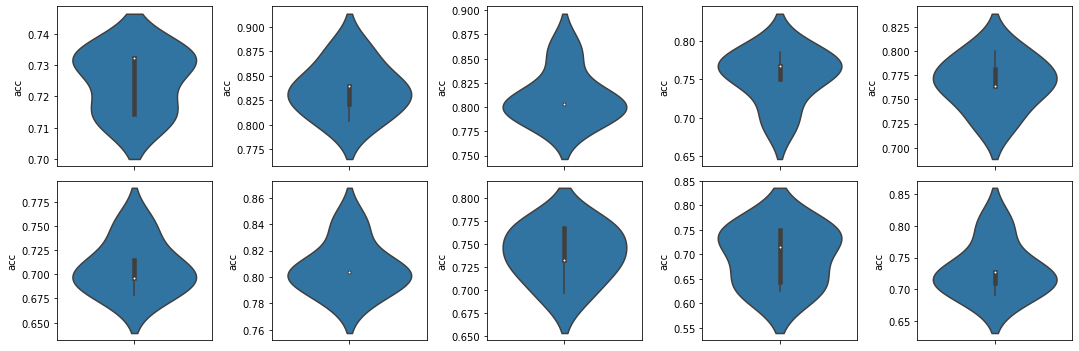

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
for i, model in enumerate(["rf", "lr"]):
    for j in range(5):
        sns.violinplot(y = data[(data["Fold"] == j) & (data["Model"] == model)]["acc"], ax = axes[i,j])
plt.tight_layout()
plt.show()
# additional ideas
# mean ROC for every fold and mean AUC for every fold including std

In [4]:
for i in enumerate(["rf", "lr"]):
    print(i)

(0, 'rf')
(1, 'lr')


In [5]:
data.loc[0, "Fold"] + 1 + data.loc[0, "Imputed Set"]

0

In [4]:
data[(data["Fold"]== 0) & (data["Model"]=="rf")]

,Fold,Model,acc,b_acc,sensitivity,specificity,ppv,fpr,tpr,auc,precision,recall,a_precision
0,0,rf,0.767857,0.737154,0.909091,0.565217,0.750000,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.18181818 0.18181818 0...,0.810277,[0.62264151 0.61538462 0.62745098 0.64 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.851994
2,0,rf,0.714286,0.685112,0.848485,0.521739,0.717949,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.21212121 0.33333333 0...,0.805665,[0.63461538 0.62745098 0.65306122 0.65957447 0...,[1. 0.96969697 0.96969697 0.93939394 0...,0.863843
4,0,rf,0.732143,0.693676,0.909091,0.478261,0.714286,[0. 0. 0. 0. 0...,[0. 0.03030303 0.09090909 0.15151515 0...,0.800395,[0.63461538 0.62745098 0.64 0.65306122 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.827009
6,0,rf,0.732143,0.700264,0.878788,0.521739,0.725000,[0. 0. 0.08695652 0.08695652 0...,[0. 0.03030303 0.03030303 0.33333333 0...,0.739130,[0.6 0.59259259 0.60377358 0.61538462 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.752704
8,0,rf,0.714286,0.691700,0.818182,0.565217,0.729730,[0. 0. 0.04347826 0.04347826 0...,[0. 0.03030303 0.03030303 0.06060606 0...,0.760211,[0.61111111 0.60377358 0.61538462 0.62745098 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.780830


In [9]:
dash = '-' * 90
print(dash)
print('{:<10s}{:<13s}{:<13s}{:<13s}{:<13s}{:<13s}{:<13s}'.format("Model","Fold 1","Fold 2","Fold 3", "Fold 4", "Fold 5", "Combined"))
print(dash)
for model in ['rf', 'lr']:
    tmp = []
    for i in range(5):
        tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)]["sensitivity"].mean())
        tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)]["sensitivity"].std())
    tmp.append(data[data["Model"] == model]["sensitivity"].mean())
    tmp.append(data[data["Model"] == model]["sensitivity"].std())
    print('{:<10s}{:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  '.format(model,*tmp))

------------------------------------------------------------------------------------------
Model     Fold 1       Fold 2       Fold 3       Fold 4       Fold 5       Combined     
------------------------------------------------------------------------------------------
rf        0.87 (0.04)  0.88 (0.02)  0.90 (0.04)  0.83 (0.08)  0.87 (0.02)  0.87 (0.05)  
lr        0.87 (0.04)  0.84 (0.01)  0.81 (0.03)  0.75 (0.05)  0.87 (0.06)  0.83 (0.06)  


In [9]:
def print_summary(data, metric):
    """
    Prints a summary for a metric in the DataFrame for each classifier
    Paramters:
    ----------
    data: pd.DataFrame
        dataframe with all evaluation metrics
    metric: string
        string identifier of metric
    """
    dash = '-' * 90
    print(metric)
    print(dash)
    print('{:<10s}{:<13s}{:<13s}{:<13s}{:<13s}{:<13s}{:<13s}'.format("Model","Fold 1","Fold 2","Fold 3", "Fold 4", "Fold 5", "Combined"))
    print(dash)
    for model in ['rf', 'lr']:
        tmp = []
        for i in range(5):
            tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)][metric].mean())
            tmp.append(data.loc[(data["Fold"] == i) & (data["Model"]==model)][metric].std())
        tmp.append(data[data["Model"] == model][metric].mean())
        tmp.append(data[data["Model"] == model][metric].std())
        print('{:<10s}{:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  {:<3.2f} ({:<3.2f})  '.format(model,*tmp))

In [10]:
cv_cols = ['acc', 'b_acc', 'sensitivity', 'specificity', 'ppv', 'auc']
for x in cv_cols:
    print_summary(data, x)

acc
------------------------------------------------------------------------------------------
Model     Fold 1       Fold 2       Fold 3       Fold 4       Fold 5       Combined     
------------------------------------------------------------------------------------------
rf        0.72 (0.01)  0.84 (0.03)  0.81 (0.03)  0.75 (0.03)  0.77 (0.03)  0.78 (0.05)  
lr        0.71 (0.03)  0.81 (0.02)  0.74 (0.03)  0.70 (0.06)  0.73 (0.04)  0.74 (0.05)  
b_acc
------------------------------------------------------------------------------------------
Model     Fold 1       Fold 2       Fold 3       Fold 4       Fold 5       Combined     
------------------------------------------------------------------------------------------
rf        0.69 (0.01)  0.81 (0.04)  0.79 (0.03)  0.73 (0.02)  0.71 (0.04)  0.75 (0.05)  
lr        0.67 (0.02)  0.78 (0.03)  0.72 (0.03)  0.68 (0.06)  0.67 (0.04)  0.70 (0.06)  
sensitivity
--------------------------------------------------------------------------------

In [13]:
data.columns
cv_cols = ['acc', 'b_acc', 'sensitivity', 'specificity', 'ppv', 'auc']
ids = []
for x in cv_cols:
    max_id = data[data['Model'] == 'rf'][x].idxmax()
    max_val = data.loc[max_id, x]
    ids.append(max_id)
    print("{:s}: id {:d} with {:.2f}".format(x, max_id, max_val))
print(max(set(ids), key = ids.count))

acc: id 10 with 0.88
b_acc: id 10 with 0.86
sensitivity: id 22 with 0.94
specificity: id 10 with 0.81
ppv: id 10 with 0.92
auc: id 14 with 0.85
10
Fold                  1
Imputed Set           1
Model                rf
Model Count           5
acc               0.875
b_acc           0.85625
sensitivity         0.9
specificity      0.8125
ppv            0.923077
auc            0.847656
Name: 10, dtype: object


In [2]:
def find_best_model(data, model):
    """
    Searches for the maximum for every evaluation metric in the dataframe for one model
    Parameters:
    -----------
    data: pd.DataFrame
        DataFrame with all evaluation metrics
    model: String
        string identifier for model
    Returns:
    --------
    int
        index of row where most metrics had a maximum (is chosen )
    """
    cv_cols = ['acc', 'b_acc', 'sensitivity', 'specificity', 'ppv', 'auc']
    ids = []
    for x in cv_cols:
        max_id = data[data['Model'] == model][x].idxmax()
        max_val = data.loc[max_id, x]
        ids.append(max_id)
        print("{:s}: id {:d} with {:.2f}".format(x, max_id, max_val))
    return max(set(ids), key = ids.count)

In [9]:
idx = find_best_model(data, "rf")
data.iloc[idx].to_frame().T

acc: id 10 with 0.88
b_acc: id 10 with 0.86
sensitivity: id 22 with 0.94
specificity: id 10 with 0.81
ppv: id 10 with 0.92
auc: id 14 with 0.85


,Fold,Imputed Set,Model,Model Count,acc,b_acc,sensitivity,specificity,ppv,auc
10,1,1,rf,5,0.875,0.85625,0.9,0.8125,0.923077,0.847656


In [5]:
def preprocess_col(col):
    t = col.strip("[]").split(" ")
    t = [x for x in t if x]
    t = [x.strip('\n') for x in t]
    t = [float(x) for x in t]
    return np.array(t)

In [51]:
tmp = []
for i in range(data.shape[0]):
    tm = preprocess_col(data.loc[i, 'fpr'])
    tmp.append(tm)
data['fpr'] = pd.Series(tmp)

In [57]:
tmp = []
for i in range(data.shape[0]):
    tm = preprocess_col(data.loc[i, 'tpr'])
    tmp.append(tm)
data['tpr'] = pd.Series(tmp)

In [11]:
data = pd.read_excel('../blood-exams/covid_study_v2.xlsx')
data.head()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,1
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [12]:
X, y = data[data.columns[:-1]], data["SWAB"]

In [27]:
d = data.describe().iloc[1:3]
d

,AGE,WBC,Platelets,Neutrophils,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
mean,61.336918,8.553069,226.532130,6.200478,0.605742,0.055024,0.014423,90.889011,54.202166,44.917293,89.893130,82.477941,380.448454,0.634409
std,18.491523,4.855353,101.174178,4.172581,0.410049,0.132237,0.039116,94.421406,57.612797,45.503232,89.089864,132.702506,193.983520,0.482461


In [58]:
header = []
for column in d.columns:
    for metric in ["mean", "std"]:
        header.append((column, metric))
empty_d = pd.DataFrame(columns=header)

In [59]:
tmp = []
for column in d.columns:
    for metric in ["mean", "std"]:
        tmp.append(d.loc[metric, column])
empty_d = empty_d.append(pd.Series(tmp, index=empty_d.columns), ignore_index=True)

In [60]:
empty_d.columns = pd.MultiIndex.from_tuples(empty_d.columns)

In [62]:
empty_d

AGE                  WBC            Platelets              \
        mean        std      mean       std       mean         std   
0  61.336918  18.491523  8.553069  4.855353  226.53213  101.174178   

  Neutrophils           Monocytes            ...        ALT             \
         mean       std      mean       std  ...       mean        std   
0    6.200478  4.172581  0.605742  0.410049  ...  44.917293  45.503232   

        ALP                   GGT                     LDH             \
       mean        std       mean         std        mean        std   
0  89.89313  89.089864  82.477941  132.702506  380.448454  193.98352   

       SWAB            
       mean       std  
0  0.634409  0.482461  

[1 rows x 28 columns]

In [ ]:
def describe_imputed(original, imputed_sets):
    # 
    header = ["Dataset"]
    for column in original.columns:
        for metric in ["mean", "std"]:
            header.append((column, metric))
    describe_df = pd.DataFrame(columns=header)
    original = original.describe().iloc[1:3]
    tmp = ["original"]
    for column in original.columns:
        for metric in ["mean", "std"]:
            tmp.append(original.loc[metric, column])
    describe_df = describe_df.append(pd.Series(tmp, index=header), ignore_index=True)
    for df, idx in imputed_sets, range(len(imputed_sets)):
        t = df.describe().iloc[1:3]
        tmp = [idx]
        for column in t.columns:
            for metric in ["mean", "std"]:
                tmp.append(t.loc[metric, column])
        describe_df = describe_df.append(pd.Series(tmp, index=header), ignore_index=True)
    describe_df.columns = describe_df.MultiIndex.from_tuples(empty_d.columns)
    return describe_df

In [2]:
val_storage = pd.read_csv("metrics/val_storage.csv")

In [6]:
val_storage.head()

,Model,acc,b_acc,sensitivity,specificity,ppv,fpr,tpr,auc,precision,recall,a_precision
0,rf,0.767857,0.737154,0.909091,0.565217,0.750000,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.09090909 0.09090909 0...,0.801713,[0.62264151 0.61538462 0.62745098 0.64 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.829101
1,lr,0.732143,0.693676,0.909091,0.478261,0.714286,[0. 0. 0. 0.04347826 0...,[0. 0.03030303 0.15151515 0.15151515 0...,0.807642,[0.61111111 0.60377358 0.61538462 0.62745098 0...,[1. 0.96969697 0.96969697 0.96969697 0...,0.854607
2,dt,0.714286,0.685112,0.848485,0.521739,0.717949,[0. 0.47826087 1. ],[0. 0.84848485 1. ],0.685112,[0.58928571 0.71794872 1. ],[1. 0.84848485 0. ],0.698454


In [8]:
cols = ["fpr", "tpr", "precision", "recall"]
for col in cols:
    tmp = []
    for i in range(val_storage.shape[0]):
        tm = preprocess_col(val_storage.loc[i, col])
        tmp.append(tm)
    val_storage[col] = pd.Series(tmp)

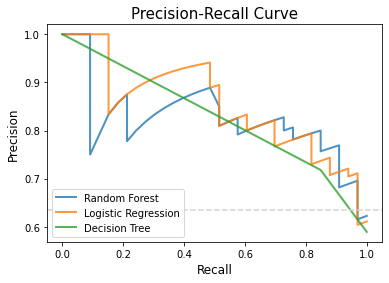

In [15]:
names = {"rf": "Random Forest", "lr": "Logistic Regression", "dt": "Decision Tree"}
plt.figure()
for index, row in val_storage.iterrows():
    plt.plot(row.recall, row.precision, lw=2, alpha=.8, label=names[row["Model"]])
plt.title("Precision-Recall Curve", fontsize=15)
value_counts = y.value_counts()
plt.axhline(value_counts[1]/y.count(), color="lightgrey", linestyle="--")
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Recall", fontsize=12)
plt.legend(loc="lower left")
plt.savefig("figures/prc.png")
plt.show()

In [3]:
imputed = pd.read_csv("metrics/imputed.csv")
imputed.head()

,Variable,AGE,AGE.1,WBC,WBC.1,Platelets,Platelets.1,Neutrophils,Neutrophils,Lymphocytes,...,AST,AST.1,ALT,ALT.1,ALP,ALP.1,GGT,GGT.1,LDH,LDH.1
0,{},mean,std,mean,std,mean,std,mean,std,mean,...,mean,std,mean,std,mean,std,mean,std,mean,std
1,original,61.776,17.816,8.553,4.855,226.532,101.174,6.200,4.173,1.187,...,54.202,57.613,44.917,45.503,89.893,89.090,82.478,132.703,380.448,193.984
2,1.0,61.839,17.773,8.574,4.863,226.654,100.820,6.597,4.482,1.260,...,54.208,57.458,47.459,49.868,82.362,66.091,79.681,119.072,379.516,199.693
3,2.0,61.839,17.773,8.574,4.863,226.654,100.820,6.597,4.482,1.260,...,54.208,57.458,47.459,49.868,82.362,66.091,79.681,119.072,379.516,199.693
4,3.0,61.832,17.768,8.557,4.840,225.951,101.067,6.597,4.301,1.236,...,54.269,57.422,47.405,50.648,81.803,65.194,73.470,103.199,365.706,178.115


In [4]:
for var in imputed.columns[1:]:
    tmp = imputed[var][2:].astype(float)
    print("{:s}: min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, mode: {:.2f}".format(var, tmp.min(), tmp.max(), tmp.mean(), tmp.median(), tmp.mode()[0]))

AGE: min: 61.73, max: 61.87, mean: 61.82, median: 61.83, mode: 61.83
AGE.1: min: 17.77, max: 17.81, mean: 17.78, median: 17.77, mode: 17.77
WBC: min: 8.53, max: 8.60, mean: 8.56, median: 8.56, mode: 8.56
WBC.1: min: 4.84, max: 4.87, mean: 4.85, median: 4.84, mode: 4.84
Platelets: min: 225.95, max: 226.65, mean: 226.38, median: 226.45, mode: 225.95
Platelets.1: min: 100.82, max: 101.32, mean: 101.00, median: 100.91, mode: 100.82
Neutrophils: min: 6.59, max: 6.65, mean: 6.61, median: 6.60, mode: 6.60
 Neutrophils: min: 4.30, max: 4.48, mean: 4.40, median: 4.41, mode: 4.30
Lymphocytes: min: 1.21, max: 1.26, mean: 1.23, median: 1.23, mode: 1.21
Lymphocytes.1: min: 0.80, max: 0.90, mean: 0.82, median: 0.81, mode: 0.81
Monocytes: min: 0.64, max: 0.66, mean: 0.65, median: 0.65, mode: 0.64
Monocytes.1: min: 0.43, max: 0.47, mean: 0.45, median: 0.46, mode: 0.43
Eosinophils: min: 0.05, max: 0.07, mean: 0.06, median: 0.05, mode: 0.05
Eosinophils.1: min: 0.12, max: 0.15, mean: 0.13, median: 0.13, 

In [ ]:
from scipy.stats import mannwhitneyu
